In [7]:
import math
import numpy as np
import pandas as pd
from csv import writer
#import umap.plot
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
df_info = pd.read_excel('data/books info/stats/jerome_all_books_info.xlsx')
alpha = 0.8



In [34]:
tokens = sum(df_info.tokens)
tokens

65957182

Text(0.5, 0, 'Number of tokens')

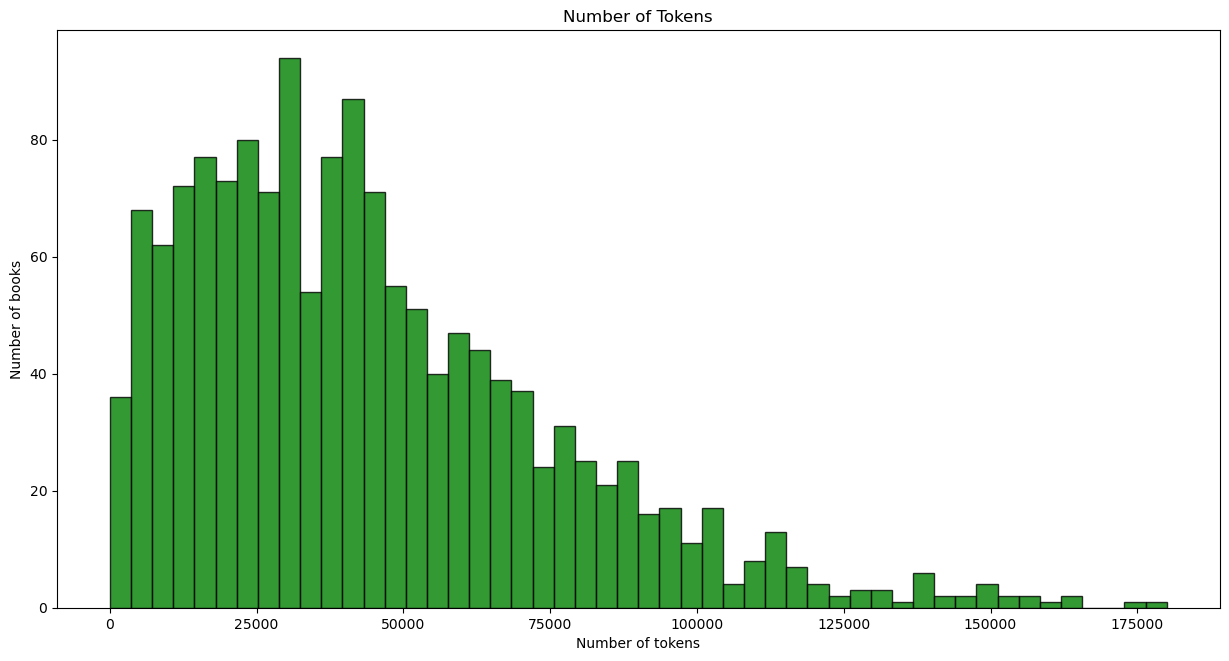

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))

books_tokens = df_info.tokens

ax.hist(books_tokens, bins=50, color = 'green', edgecolor='black', alpha = alpha, range = [0, 180000])
ax.set_title('Number of Tokens') 

ax.set_ylabel('Number of books')
ax.set_xlabel('Number of tokens')


Text(0.5, 0, 'Number of words')

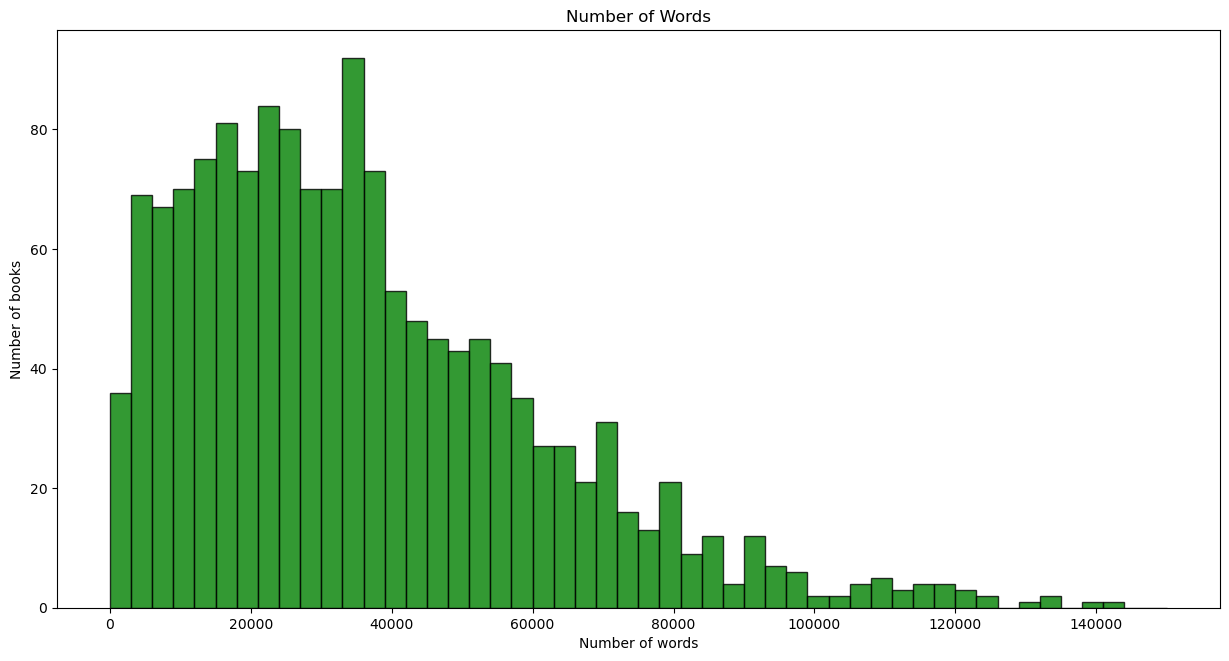

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))

books_tokens = df_info.words

ax.hist(books_tokens, bins=50, color = 'green', edgecolor='black', alpha = alpha, range = [0, 150000])
ax.set_title('Number of Words')  
ax.set_ylabel('Number of books')
ax.set_xlabel('Number of words')

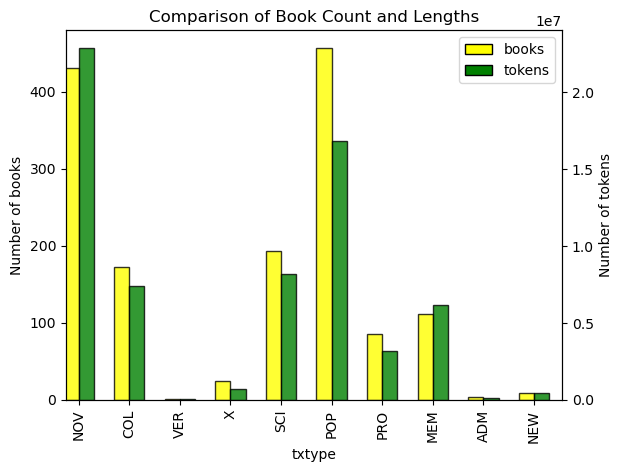

In [28]:
txtype_info = {txtype[:3] if 'X' not in txtype else 'X': [len(df_info[df_info['txtype'] == txtype]), sum(df_info[df_info['txtype'] == txtype].tokens) ] for txtype in df_info.txtype.unique() }

h = pd.DataFrame.from_dict(txtype_info, orient='index')

h.columns = ['books', 'tokens']
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

h.books.plot(kind = 'bar',  color = 'yellow', edgecolor='black',ax=ax, alpha = alpha, width=width, position=1)
h.tokens.plot(kind = 'bar',  color = 'green', edgecolor='black',ax=ax2, alpha = alpha, width=width, position=0)
plt.xticks(rotation = 50)

ax.set_ylabel('Number of books')
ax2.set_ylabel('Number of tokens')
ax.set_xlabel('txtype')
ax.set_title('Comparison of Book Count and Lengths') 

legend_elements = [Patch(facecolor='yellow', edgecolor='black',
                         label='books'),
                   Patch(facecolor='green', edgecolor='black',
                         label='tokens')]
ax.legend(handles=legend_elements)


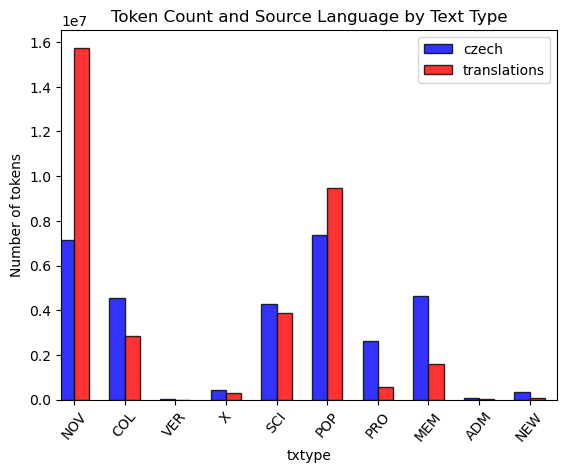

In [30]:
txtype_info_language = {txtype[:3] if 'X' not in txtype else 'X': [sum(df_info[(df_info['txtype'] == txtype) & (df_info['srclang'] == 'cs: čeština')].tokens), sum(df_info[(df_info['txtype'] == txtype) & (df_info['srclang'] != 'cs: čeština')].tokens) ] for txtype in df_info.txtype.unique() }

h = pd.DataFrame.from_dict(txtype_info_language, orient='index')

h.columns = ['czech', 'translations']
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.3

h.czech.plot(kind = 'bar',  color = 'blue', edgecolor='black',ax=ax, alpha = alpha, width=width, position=1)
h.translations.plot(kind = 'bar',  color = 'red', edgecolor='black',ax=ax,alpha = alpha,  width=width, position=0)
plt.xticks(rotation = 50)

ax.set_ylabel('Number of tokens')
ax.set_xlabel('txtype')

ax.set_title('Token Count and Source Language by Text Type')

ax.legend()

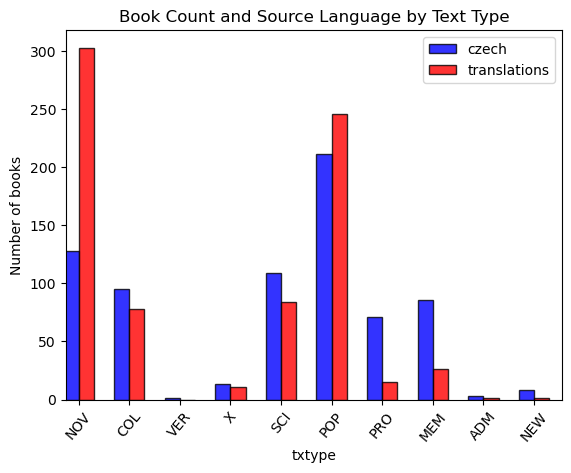

In [31]:
txtype_info_language = {txtype[:3] if 'X' not in txtype else 'X': [len(df_info[(df_info['txtype'] == txtype) & (df_info['srclang'] == 'cs: čeština')]), len(df_info[(df_info['txtype'] == txtype) & (df_info['srclang'] != 'cs: čeština')]) ] for txtype in df_info.txtype.unique() }

h = pd.DataFrame.from_dict(txtype_info_language, orient='index')

h.columns = ['czech', 'translations']
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.3

h.czech.plot(kind = 'bar',  color = 'blue', edgecolor='black',ax=ax, alpha = alpha, width=width, position=1)
h.translations.plot(kind = 'bar',  color = 'red', edgecolor='black',ax=ax,alpha = alpha,  width=width, position=0)
plt.xticks(rotation = 50)

ax.set_ylabel('Number of books')
ax.set_xlabel('txtype')

ax.set_title('Book Count and Source Language by Text Type')

ax.legend()

In [24]:

df_info['type'] = df_info['txtype'].apply(lambda x: 'fiction' if x in ['NOV: próza', 'COL: kratší próza', 'VER: poezie', 'MEM: memoáry, autobiografie', 'X: unclassified'] else 'non-fiction') #
type_info_fiction_book_count = {type[:3] if 'X' not in type else 'X': [len(df_info[(df_info['type'] == type) & (df_info['srclang'] == 'cs: čeština')]), len(df_info[(df_info['type'] == type) & (df_info['srclang'] != 'cs: čeština')]) ] for type in df_info.type.unique() }
type_info_fiction_token_count = {type[:3] if 'X' not in type else 'X': [sum(df_info[(df_info['type'] == type) & (df_info['srclang'] == 'cs: čeština')].tokens), sum(df_info[(df_info['type'] == type) & (df_info['srclang'] != 'cs: čeština')].tokens) ] for type in df_info.type.unique() }

In [20]:
df_info.type

0           fiction
1           fiction
2           fiction
3           fiction
4           fiction
           ...     
1485    non-fiction
1486    non-fiction
1487    non-fiction
1488    non-fiction
1489    non-fiction
Name: type, Length: 1490, dtype: object

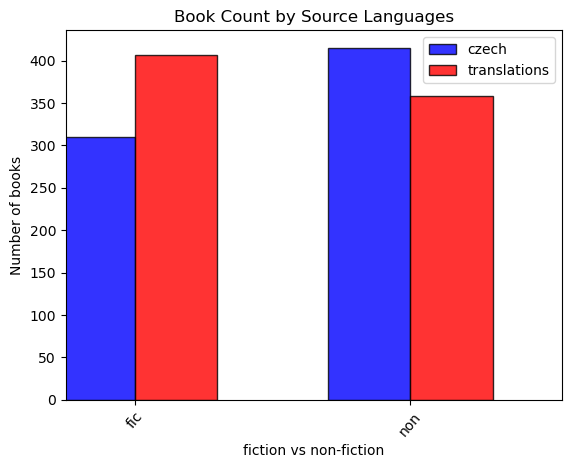

In [32]:
h = pd.DataFrame.from_dict(type_info_fiction_book_count, orient='index')

h.columns = ['czech', 'translations']
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.3

h.czech.plot(kind = 'bar',  color = 'blue', edgecolor='black',ax=ax, alpha = alpha, width=width, position=1)
h.translations.plot(kind = 'bar',  color = 'red', edgecolor='black',ax=ax,alpha = alpha,  width=width, position=0)
plt.xticks(rotation = 50)

ax.set_ylabel('Number of books')
plt.xlabel('fiction vs non-fiction')
plt.title('Book Count by Source Languages')

ax.legend()

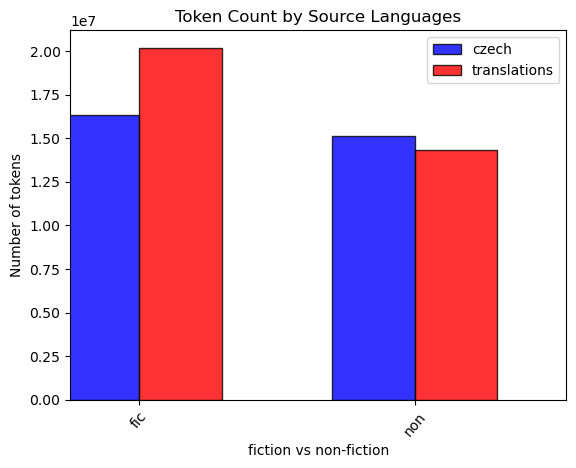

In [33]:
h = pd.DataFrame.from_dict(type_info_fiction_token_count, orient='index')

h.columns = ['czech', 'translations']
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.3

h.czech.plot(kind = 'bar',  color = 'blue', edgecolor='black',ax=ax, alpha = alpha, width=width, position=1)
h.translations.plot(kind = 'bar',  color = 'red', edgecolor='black',ax=ax,alpha = alpha,  width=width, position=0)
plt.xticks(rotation = 50)

ax.set_ylabel('Number of tokens')
plt.xlabel('fiction vs non-fiction')
plt.title('Token Count by Source Languages')

ax.legend()

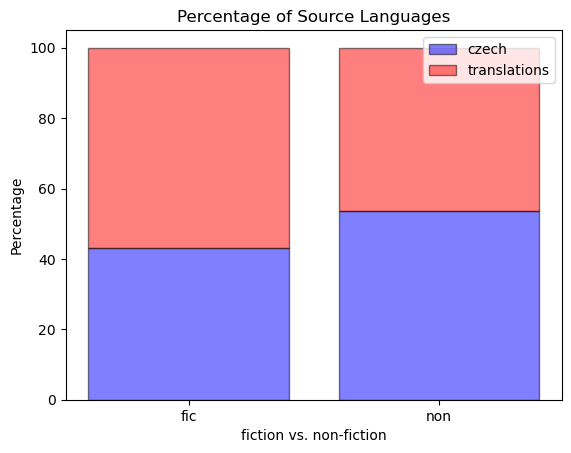

In [59]:



# Calculate percentages
data1 = [x[0] for x in type_info_fiction_book_count.values()]
data2 = [x[1] for x in type_info_fiction_book_count.values()]

total = [x1+ x2 for x1,x2 in zip(data1, data2)]
percentages1 = [val / total[i] * 100 for i,val in enumerate(data1)]
percentages2 = [val / total[i] * 100 for i,val in enumerate(data2)]

# Plotting
plt.bar(type_info_fiction_book_count.keys(), percentages1, color='blue', edgecolor='black', label='czech', alpha=alpha)
plt.bar(type_info_fiction_book_count.keys(), percentages2, color='red', edgecolor='black', label='translations', alpha=alpha, bottom=percentages1)

plt.xlabel('fiction vs. non-fiction')
plt.ylabel('Percentage')
plt.title('Percentage of Source Languages')
plt.legend()

plt.show()

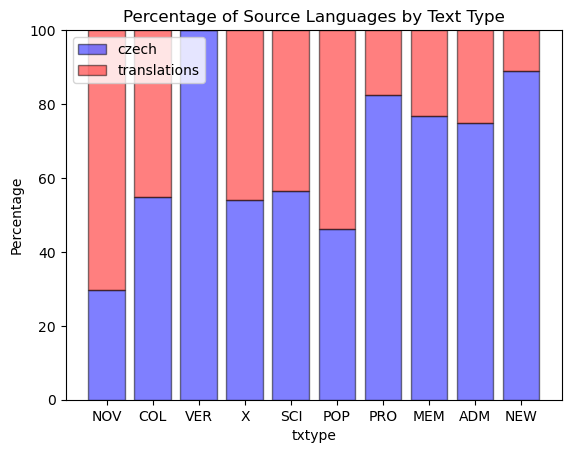

In [60]:

# Calculate percentages
data1 = [x[0] for x in txtype_info_language.values()]
data2 = [x[1] for x in txtype_info_language.values()]

total = [x1+ x2 for x1,x2 in zip(data1, data2)]
percentages1 = [val / total[i] * 100 for i,val in enumerate(data1)]
percentages2 = [val / total[i] * 100 for i,val in enumerate(data2)]

# Plotting
plt.bar(txtype_info_language.keys(), percentages1, color='blue', edgecolor='black', label='czech', alpha=alpha)
plt.bar(txtype_info_language.keys(), percentages2, color='red', edgecolor='black', label='translations', alpha=alpha, bottom=percentages1)

plt.xlabel('txtype')
plt.ylabel('Percentage')
plt.title('Percentage of Source Languages by Text Type')
plt.legend()

plt.show()